# Kevin Martin & Jeffrey Alexovich CIS600 - Sunday @ 9:00pm EST

Final Project

Dataset used: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Outline:**
1. [Business Objectives](#Businessobjectives)
2. [Data Understanding](#Dataunderstanding)
3. [Data Preparation](#Datapreparation)
4. [Model Training/Testing](#Modeltrain)
5. [Analysis](#Analysis)
6. [Conclusion](#Conclusion)

# 1. Business Objectives <a class="anchor" id="Businessunderstanding"></a>
Use multiple classification algorithms to determine the quality of red wines based on a variety of characteristics.

## 1.1 Preliminary Assessment<a class="anchor" id="Assessthecurrentsituation"></a>

The dataset has almost 1,600 records and 11 columns of data, and it appears to be very complete. There are no missing records, duplicate records, redundant columns, or irrelevant columns. Furthermore, all the features are numeric, which should aid in the success of our classification algorithms.

However, with only 1,600 records we may not have enough to generate accurate models. We do not expect this to be a problem but are aware of this fact.

 ## 1.2 Desired Outputs <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Identifying attributes that are more likely to predict the quality of wine
- Classify wine into a binary "good" or "bad" category
- Classify wine into multiple categories based on their objective "quality" score


**Data mining success criteria**
- Clean and prepare the data so no false conclusions are reached (avoiding the "garbage-in-garbage-out" paradigm)
- Avoid erroneous patterns and bring errors down to an acceptable level

 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- Our ultimate goal is to predict whether or not we can predict the quality of a wine given its unique features.

# 2. Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a> 

In [185]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import nan
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier

import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [119]:
#Data source: 
#Source Query location: 
red_data = './datasets_4458_8204_winequality-red.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df =  pd.read_csv(red_data, sep=',') 

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
The data has 12 columns, all of which are numeric. The final column, "quality", is the target column, which is rating from 1-10 of quality (1 being the worst and 10 being the best).

Additionally, all the feature columns are of type float, while the target column is of type int. This will make it easier to select the features as we will simply omit the single int column.

In [120]:
#This will validate our initial observation of the amount of unique records as well as attributes/column
print('Data shape:')
print(df.shape)
print(df.info())

Data shape:
(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
The data is extremly complete, without any missing values. As such, no further cleaning needs to be done here.

In [121]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("\nThe selections has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
    
print(missing_values_table(df))


The selections has 12 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


In [122]:
# Get the columns with > 50% missing
missing_train = missing_values_table(df);
miss_col_train = list(missing_train[missing_train['% of Total Values'] > 50].index)
print('There are %d columns missing more than half the data.' % len(miss_col_train))


The selections has 12 columns.
There are 0 columns that have missing values.
There are 0 columns missing more than half the data.


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
To address outliers, we will look at the fields using a standard box-and-whisker plot, observing visually those data points which may need to be removed.

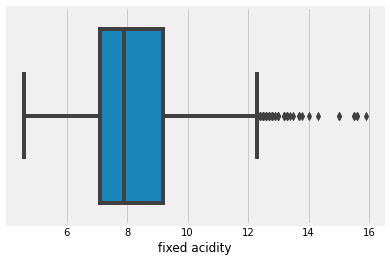

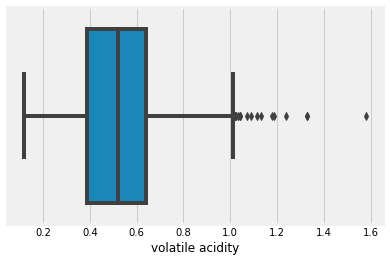

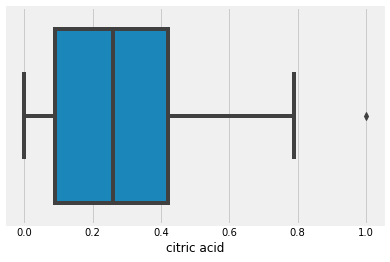

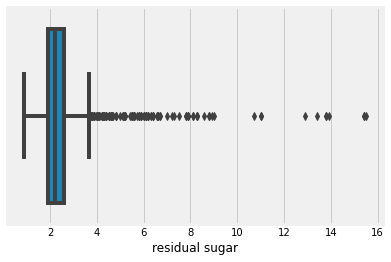

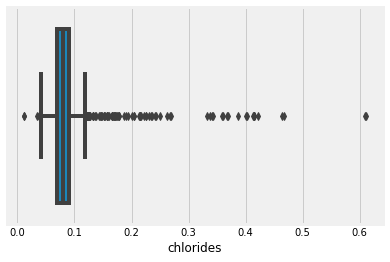

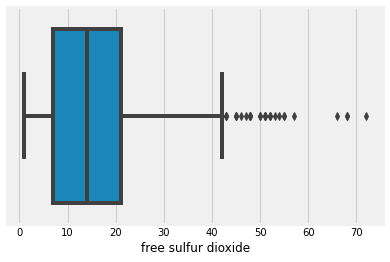

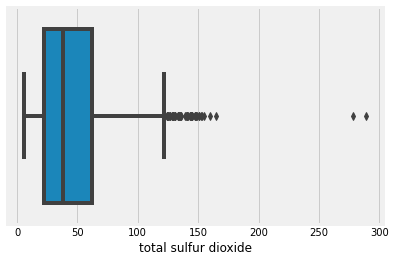

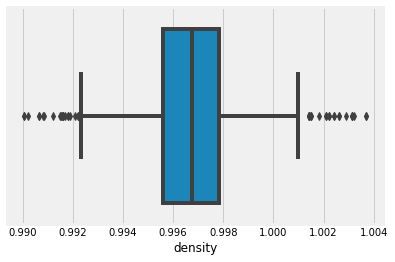

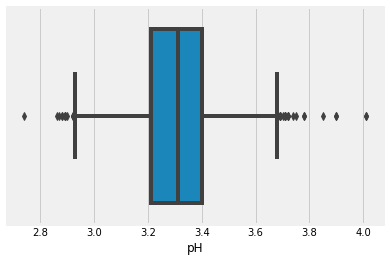

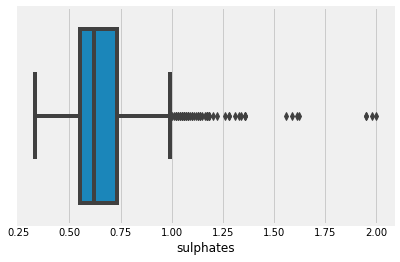

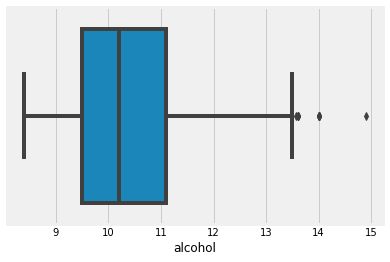

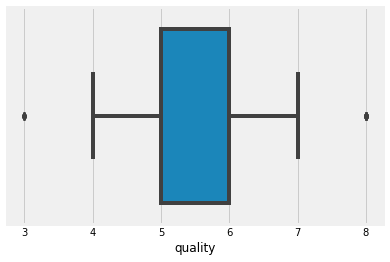

In [123]:
for col in df:
    sns.boxplot(x=df[col])
    plt.show()

While see what could be considered outliers, note the relative scales for each graph. None of the data points are completely out of line (as in an order of magnitude off), and we feel confident in leaving the dataset untouched in this regard.

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
For a quick visual look at our key attribute of quality, consider a simple histogram. It is immediately clear that the vast majority of wines are in the right in the middle. We see few wines that are on the edges as very high quality or very poor quality.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

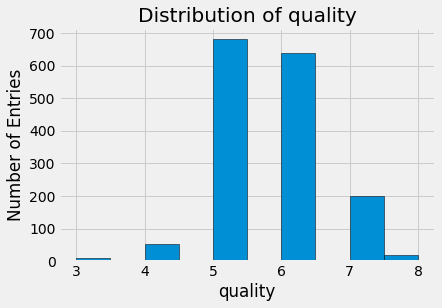

In [124]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);
        plt.show()

        
hist_chart(df, 'quality')

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
To get a general sense of corrleations, a heatmap across all vairables as compared to all others was generated. Clearly, there are some moderatey correlated attributes, but to the point of quality, a more focused list of correlations was generated. Here, we can see the more relevant relationships and begin to map out where the focus of the analysis will be directed. 

<Figure size 1440x1440 with 0 Axes>

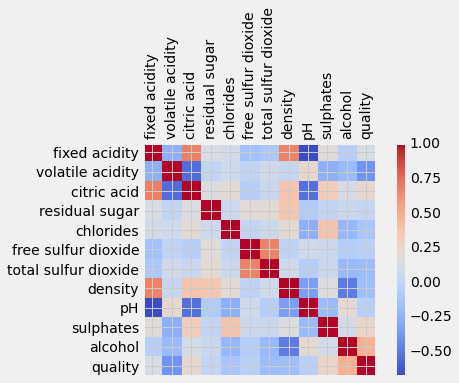

In [125]:
fig=plt.figure(figsize=(18, 18), dpi= 80, facecolor='w', edgecolor='k')
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot()
cax = ax.matshow(corr,cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [126]:
corr_data = df[df.columns[1:]].corr()['quality'][:]
sorted_corr_data = corr_data.sort_values(kind="quicksort")
print(sorted_corr_data)

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


# 3. Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Data Selection <a class="anchor" id="Selectyourdata"></a>
We will be using 100% of the available data, and splitting it into train/test sets in section 4.

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.1 Altering Data Types and Dealing with Zeros <a class="anchor" id="AlteringDatatypes"></a>
There is no need to alter any data types, nor deal with excessive zeros.

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>

In [127]:
print('Original shape of data')
print(df.shape)
print('Shape after removing duplicates')
df.drop_duplicates(keep='first')
print(df.shape)

Original shape of data
(1599, 12)
Shape after removing duplicates
(1599, 12)


Note that the shape remains the same after trying to remove duplicates. Thus no duplicate records exist.

## 3.2.3 Missing Values
No missing values to address.

In [128]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1599, 12)
(1599, 12)


# 4. Model Training/Testing<a class="anchor" id="Modeltrain"></a>

## 4.1 Multi-Class Testing

In [129]:
"""
'binary':
Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

'samples':
Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).
"""

metric_eval = 'macro'

num_vars = df.select_dtypes(['float64']).columns
print('Columns to check: ', num_vars)
x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

def evaluate(model, graph_flag):
    out_mod = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print ("Accuracy:", accuracy_score(y_test, y_pred)) 
    print("Precision:",metrics.precision_score(y_test, y_pred, average=metric_eval))
    print("Recall:",metrics.recall_score(y_test, y_pred, average=metric_eval))
    print("F1:", metrics.f1_score(y_test,y_pred, average=metric_eval))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm)
        sns.heatmap(cm)
    return out_mod

Columns to check:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [130]:
gnb = GaussianNB()
gnb_train = evaluate(gnb, 0)

Accuracy: 0.5208333333333334
Precision: 0.3296248216351309
Recall: 0.3655895691609978
F1: 0.34287496129601386


In [131]:
dtc = DecisionTreeClassifier()
evaluate(dtc, 0)

Accuracy: 0.5833333333333334
Precision: 0.3490762213150376
Recall: 0.39342403628117917
F1: 0.3618843577905473


DecisionTreeClassifier()

In [132]:
#xgb = XGBClassifier()
#xgb_train = evaluate(xgb, 0)

In [133]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_train = evaluate(rfc, 0)

Accuracy: 0.6208333333333333
Precision: 0.3443195448881436
Recall: 0.31320861678004536
F1: 0.3162088354333387


## 4.2 Binary Classification
Classifying wines as either "good" or "bad", with a rating over greater than or equal to 6 indicating good.

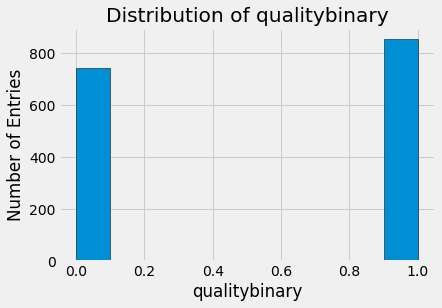

In [134]:
df2 = df.copy()
df2['qualitybinary'] = np.where(df2['quality']>=6,1,0)
hist_chart(df2, 'qualitybinary')

In [135]:
corr_data2 = df2[df2.columns[1:]].corr()['qualitybinary'][:]
sorted_corr_data2 = corr_data2.sort_values(kind="quicksort")
print(sorted_corr_data2)

volatile acidity       -0.321441
total sulfur dioxide   -0.231963
density                -0.159110
chlorides              -0.109494
free sulfur dioxide    -0.061757
pH                     -0.003264
residual sugar         -0.002160
citric acid             0.159129
sulphates               0.218072
alcohol                 0.434751
quality                 0.848279
qualitybinary           1.000000
Name: qualitybinary, dtype: float64


In [136]:
num_vars_bin = df2.select_dtypes(['float64']).columns
print('Columns to check: ', num_vars_bin)
x_bin = df2[num_vars_bin]
y_bin = df2.qualitybinary

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin, y_bin, test_size=0.3, random_state=16)

scaler_bin = StandardScaler().fit(x_train_bin)
x_train_bin = scaler.transform(x_train_bin)
x_test_bin = scaler.transform(x_test_bin)

def evaluate_bin(model, graph_flag):
    out_bin = model.fit(x_train_bin, y_train_bin)
    y_pred_bin = model.predict(x_test_bin)
    cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
    print ("Accuracy:", accuracy_score(y_test_bin, y_pred_bin)) 
    print("Precision:",metrics.precision_score(y_test_bin, y_pred_bin))
    print("Recall:",metrics.recall_score(y_test_bin, y_pred_bin))
    print("F1:", metrics.f1_score(y_test_bin,y_pred_bin))
    if graph_flag == 1:
        print ("Confusion Matrix: \n", cm_bin)
        sns.heatmap(cm_bin)
    return out_bin

Columns to check:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [137]:
gnb_bin = GaussianNB()
gnb_train_bin = evaluate_bin(gnb_bin, 0)

Accuracy: 0.7041666666666667
Precision: 0.7142857142857143
Recall: 0.7421875
F1: 0.7279693486590038


In [138]:
dtc_bin = DecisionTreeClassifier()
dtc_train_bin = evaluate_bin(dtc_bin, 0)

Accuracy: 0.7229166666666667
Precision: 0.7269372693726938
Recall: 0.76953125
F1: 0.747628083491461


In [139]:
#xgb_bin = XGBClassifier()
#xgb_train_bin = evaluate_bin(xgb_bin, 0)

In [140]:
rfc_bin = RandomForestClassifier(n_estimators=10)
rfc_train_bin = evaluate_bin(rfc_bin, 0)

Accuracy: 0.7479166666666667
Precision: 0.7824267782426778
Recall: 0.73046875
F1: 0.7555555555555554


In [141]:
#Set up the grid search for a decision tree approach
sc = StandardScaler()
pca = decomposition.PCA()
decisiontree = tree.DecisionTreeClassifier()

# Create a pipeline for the tree
pipe = Pipeline(steps=[('sc', sc),
                       ('pca', pca),
                       ('decisiontree', decisiontree)])

#Set the parameters to test
n_components = list(range(1,x_bin.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [4,6,8,12]
parameters = dict(pca__n_components=n_components,
                  decisiontree__criterion=criterion,
                  decisiontree__max_depth=max_depth)

#Check best parameters
clf_G = GridSearchCV(pipe, parameters)
clf_G.fit(x_bin, y_bin)

#View The Best Parameters
print('Best Criterion:', clf_G.best_estimator_.get_params()['decisiontree__criterion'])
print('Best max_depth:', clf_G.best_estimator_.get_params()['decisiontree__max_depth'])
print('Best Number Of Components:', clf_G.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_G.best_estimator_.get_params()['decisiontree'])

#Use Cross Validation To Evaluate Model
#CV_Result = cross_val_score(clf_G, x_bin, y_bin, cv=4, n_jobs=-1)
#print(); print(CV_Result)
#print(); print(CV_Result.mean())
#print(); print(CV_Result.std())

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 10

DecisionTreeClassifier(max_depth=6)


In [142]:
#Create a new algorithm based on optimized grid search parameters
clf2 = DecisionTreeClassifier(criterion="gini", max_depth=6)
clf2_train_bin = evaluate_bin(clf2, 0)

Accuracy: 0.7104166666666667
Precision: 0.7294117647058823
Recall: 0.7265625
F1: 0.7279843444227004


## 4.3 Regression

Predicting the quality score of the wine from 0 to 10, the number can be fractional.  We also round this to the nearest whole number to get an accuracy score for the model.

In [165]:
x = df[num_vars]
y = df.quality

avval = [np.mean(y) for i in y]
print('Baseline Errors')
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y, avval)))
print('Mean Absolute Error: ', mean_absolute_error(y, avval))

Baseline Errors
Root Mean Squared Error:  0.8073168769639513
Mean Absolute Error:  0.6831779242889846


In [148]:
def evaluate_regression(mdl,mdl_name,x,y,cols):
    x_train, x_test, y_train, y_test = train_test_split(x[cols], y, test_size=0.3, random_state=16)

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)

    
    mdl.fit(x_train,y_train)
    predicted_data = mdl.predict(x_test)
    print(mdl_name, ' using ', cols)
    print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
    print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
    print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))
    print()

lg = LinearRegression()
lg_name = 'Linear Regression'    
    
# Linear regression using all columns
evaluate_regression(lg,lg_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(lg,lg_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(lg,lg_name,x,y,corr_cols)

Linear Regression  using  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Root Mean Squared Error:  0.6812702851892525
Mean Absolute Error:  0.5206492724535853
Accuracy:  0.5916666666666667

Linear Regression  using  Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.6798464701733354
Mean Absolute Error:  0.531514382101076
Accuracy:  0.5625

Linear Regression  using  Index(['volatile acidity', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.6918496027881663
Mean Absolute Error:  0.5406253675128926
Accuracy:  0.5604166666666667



In [153]:
dtr = DecisionTreeRegressor()
dtr_name = 'Decision Tree Regressor'

# Linear regression using all columns
evaluate_regression(dtr,dtr_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(dtr,dtr_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(dtr,dtr_name,x,y,corr_cols)

Decision Tree Regressor  using  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Root Mean Squared Error:  0.8403868156985805
Mean Absolute Error:  0.51875
Accuracy:  0.5666666666666667

Decision Tree Regressor  using  Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.8366600265340756
Mean Absolute Error:  0.5083333333333333
Accuracy:  0.575

Decision Tree Regressor  using  Index(['volatile acidity', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.8369838410109115
Mean Absolute Error:  0.5350396825396826
Accuracy:  0.5479166666666667



In [152]:
rfr = RandomForestRegressor()
rfr_name = 'Random Forest Regressor'

# Linear regression using all columns
evaluate_regression(rfr,rfr_name,x,y,num_vars)

# Linear regression using higher correlation columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .2].index
evaluate_regression(rfr,rfr_name,x,y,corr_cols)

# Linear regression using only two most correlated columns
t = sorted_corr_data[num_vars]
corr_cols = t[abs(t) > .3].index
evaluate_regression(rfr,rfr_name,x,y,corr_cols)

Random Forest Regressor  using  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Root Mean Squared Error:  0.6272567589645142
Mean Absolute Error:  0.4413541666666667
Accuracy:  0.6458333333333334

Random Forest Regressor  using  Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.6388988133891
Mean Absolute Error:  0.4666673611111111
Accuracy:  0.6333333333333333

Random Forest Regressor  using  Index(['volatile acidity', 'alcohol'], dtype='object')
Root Mean Squared Error:  0.6856430130445913
Mean Absolute Error:  0.5127345120157619
Accuracy:  0.5770833333333333



In [187]:
param_grid = {'n_estimators': [n for n in range(10,200,10)],
             'max_features': ['auto','sqrt'],
             'min_samples_split': [2,5,10,20],
             'max_depth': [5,10,20,40,80]}

#Check best parameters
clf_rfr = GridSearchCV(rfr, param_grid)

x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


clf_rfr.fit(x_train, y_train)

#View The Best Parameters
print('Best n_estimators:', clf_rfr.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', clf_rfr.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_rfr.best_estimator_.get_params()['min_samples_split'])
print('Best max_features:', clf_rfr.best_estimator_.get_params()['max_features'])

rfr_best = clf_rfr.best_estimator_


Best n_estimators: 190
Best max_depth: 20
Best min_samples_split: 2
Best max_features: sqrt


In [188]:
predicted_data = rfr_best.predict(x_test)
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))
print(classification_report(y_test, y_pred.round()))

Root Mean Squared Error:  0.6169848878167059
Mean Absolute Error:  0.44341084225458266
Accuracy:  0.6458333333333334
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.10      0.15        21
           5       0.64      0.58      0.61       200
           6       0.51      0.73      0.60       196
           7       0.62      0.09      0.16        56
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.36      0.25      0.25       480
weighted avg       0.56      0.56      0.52       480



In the next section we look at if we can evaluate the quality of wine with attributes that can be evaluated outside of a lab environment.  Percent Alcohol is required to be included on all alcoholic beverages so we will use that, and pH testing kits can be purchased and administered at low cost so we will also use that.

In [155]:
athome_cols = ['alcohol','pH']
evaluate_regression(lg,lg_name,x,y,athome_cols)

evaluate_regression(rfr,rfr_name,x,y,athome_cols)

evaluate_regression(dtr,dtr_name,x,y,athome_cols)

Linear Regression  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.7387776615088736
Mean Absolute Error:  0.5818357616666113
Accuracy:  0.5583333333333333

Random Forest Regressor  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.7737749559655775
Mean Absolute Error:  0.5786525177368927
Accuracy:  0.5333333333333333

Decision Tree Regressor  using  ['alcohol', 'pH']
Root Mean Squared Error:  0.9342654076074164
Mean Absolute Error:  0.6320138888888889
Accuracy:  0.4791666666666667



In [163]:
param_grid = {'n_estimators': [n for n in range(10,200,10)],
             'max_features': [None],
             'min_samples_split': [2,5,10,20,30,40],
             'max_depth': [5,10,20,40,80,120]}

#Check best parameters
clf_rfr = GridSearchCV(rfr, param_grid)

x = df[athome_cols]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


clf_rfr.fit(x_train, y_train)

#View The Best Parameters
print('Best n_estimators:', clf_rfr.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', clf_rfr.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_rfr.best_estimator_.get_params()['min_samples_split'])
print('Best max_features:', clf_rfr.best_estimator_.get_params()['max_features'])

rfr_best = clf_rfr.best_estimator_



Best n_estimators: 40
Best max_depth: 5
Best min_samples_split: 5
Best max_features: None


In [164]:
predicted_data = rfr_best.predict(x_test)
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, predicted_data)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, predicted_data))
print('Accuracy: ', accuracy_score(y_test, predicted_data.round()))

Root Mean Squared Error:  0.7277175865544794
Mean Absolute Error:  0.5790219895836011
Accuracy:  0.55


In [182]:
def create_ann_2(activation,units):
    model = Sequential()
    model.add(Dense(units=units, activation=activation,input_shape=(11,)))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


x = df[num_vars]
y = df.quality

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=16)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

param_grid = {'activation': ['relu','sigmoid','tanh'],
             'units': [5,10,15,20]}

cv = KFold(n_splits=4, shuffle=True, random_state=16)
# ANN 2
model_ann2 = KerasRegressor(build_fn=create_ann_2, epochs=16, batch_size=10,verbose=0)
grid_ann2 = GridSearchCV(estimator=model_ann2,param_grid=param_grid,cv=cv,n_jobs=-1)
grid_ann2.fit(x_train,y_train)

ann2_cv = grid_ann2.best_estimator_
y_pred = ann2_cv.predict(x_test)



----ANN 2 Hidden Layers----
Root Mean Squared Error:  0.7277175865544794
Mean Absolute Error:  0.5790219895836011
Accuracy:  0.55
---------------------------------


In [186]:
print('----ANN 2 Hidden Layers----')
print('Root Mean Squared Error: ',  np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))
print('---------------------------------')


----ANN 2 Hidden Layers----
Root Mean Squared Error:  0.6763711703540864
Mean Absolute Error:  0.5254024629791577
Accuracy:  0.55625
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.40      0.10      0.15        21
           5       0.64      0.58      0.61       200
           6       0.51      0.73      0.60       196
           7       0.62      0.09      0.16        56
           8       0.00      0.00      0.00         4

    accuracy                           0.56       480
   macro avg       0.36      0.25      0.25       480
weighted avg       0.56      0.56      0.52       480

---------------------------------


# 5 Analysis <a class="anchor" id="Analysis"></a>


## 5.1 Binary Classification

In order to evaluate the relative success of our classification algorithms, we chose to focus on accuracy. However, we do note that having high scores in both precision and recall (efficiently expressed by F1 as well) is important. Interestingly, our better performing algorithms also had higher F1 scores.

In [ ]:
binary_data=[
    ['Naive Bayes', 'None', 0.704, 0.714, 0.742, 0.727],
    ['Decision Tree', 'None', 0.585, 0.317, 0.337, 0.322],
    ['Decision Tree - Grid Search', 'critereon, max_depth', 0.718, 0.737, 0.734, 0.735],
    ['Gradient Boosting - XGB', 'N/A', 0.770, 0.770, 0.812, 0.790],
    ['Random Forrest', 'n_estimators', 0.756, 0.795, 0.730, 0.761],

]
df_table = pd.DataFrame(binary_data)
# sort table in descending order by accuracy
df_table = df_table.sort_values(by=[2], kind="quicksort", ascending=False)
df_table[2] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[2]], index = df_table.index)
df_table[3] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[3]], index = df_table.index)
df_table[4] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[4]], index = df_table.index)
df_table[5] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_table[5]], index = df_table.index)
fig = go.Figure(data=[go.Table(header=dict(values=['Method','Hyperparameters', 'Accuracy', 'Precision',
                                                  'Recall', 'F1']),
                 cells=dict(values=[df_table[0], df_table[1], df_table[2], df_table[3], df_table[4], df_table[5]]))
                     ])
fig.show()

## 5.2 Regression

When evaluating the regression algorithm, we chose to focus on the square root of the mean squared error (root MSE). This metric is more appropriate for evaluating multi-class accuracy. We also included mean absolute error (MAE) and accuracy as additional benchmarks, but they did not carry as much importance.

Another item set we tested were the features themselves. We ran our three algorithms three times, once with all available features, one with the highly correlated features, and one with only the top two most highly correlated features. To control for this, we did not tune the hyperparameters, instead focusing on how the number of attributes included played a roll.

As one additional check, we ran a grid search on the random forest algorithm to see how much tuning the hyperparameters would compare to feature selection.

In [ ]:
regression_data=[
    ['Linear Regression - All', 'None', 0.681, 0.520, 0.591],
    ['Linear Regression - High Correlations', 'None', 0.679, 0.531, 0.562],
    ['Linear Regression - Top Two', 'None', 0.691, 0.540, 0.560],
    ['Decision Tree - All', 'None', 0.855, 0.514, 0.577],
    ['Decision Tree - High Correlations', 'None', 0.830, 0.506, 0.575],
    ['Decision Tree - Top Two', 'None', 0.845, 0.538, 0.547],
    ['Random Forest - All', 'None', 0.667, 0.471, 0.656],
    ['Random Forest - High Correlations', 'None', 0.671, 0.480, 0.606],
    ['Random Forest - Top Two', 'critereon, max_depth', 0.697, 0.516, 0.552],
    ['Random Forest - Grid Search', 'n_estimators, max_depth, min_samples_split, max_features', 0.621, 0.446, 0.650],

]
df_reg = pd.DataFrame(regression_data)
# sort table in descending order by accuracy
df_reg = df_reg.sort_values(by=[2], kind="quicksort", ascending=True)
#df_reg[2] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[2]], index = df_reg.index)
#df_reg[3] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[3]], index = df_reg.index)
df_reg[4] = pd.Series(["{0:.1f}%".format(val * 100) for val in df_reg[4]], index = df_reg.index)
fig = go.Figure(data=[go.Table(header=dict(values=['Method','Hyperparameters', 'Root MSE', 'MAE', 'Accuracy']),
                 cells=dict(values=[df_reg[0], df_reg[1], df_reg[2], df_reg[3], df_reg[4]]))
                     ])
fig.show()

# 6. Conclusion <a class="anchor" id="Conclusion"></a>

In the binary classification situation, we found that the XGBoosting algorithm performed the best overall. As it is already "pre-tuned", this makes sense. We also found it interesting how much better the decision tree algorithm performed once we optimized the parameters using a grid search. That also makes sense, but the performance improvement was quite dramatic.

With regards to regression, we found that, in general, the more features we included the better. On top of that, the better performing algorithms just generally performed better. The optimized random forest showed, unsurprisingly, the best results in terms of lowest root MSE, but also had the lowest MAE and almost the highest accuracy.

Our overall takeaway is that we are pleased with how our algorithms perform in both scenarios. Classifying a wine as a binary "good" or "bad" should not be difficult given the amount of features to examine. An accuracy and F1 score in the high 70's is a goodbenchmark. We were more pleased with the multi-classification regression algorithms. While the accuracy was lower than in a binary classification, which is to be expected, it's still high enough to get the wines close to their true scores.